## <font color = darkblue> Sample program for MLR and Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

import sklearn 

from sklearn import datasets
import random
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


import warnings
warnings.filterwarnings('ignore') 
sns.set(rc={'figure.figsize':(11,8)})

pd.options.display.float_format = '{:.2f}'.format

## <font color= darkblue> Import County Health Rankings for year 2022

In [2]:
%cd '/Volumes/LACIE SHARE/Courses/Roux /Machine Learning/Data/County Health Rankings'
os.listdir()

# The first column is index: skipping that column
ct = pd.read_csv("sample_county_MLR_Logistic.csv", usecols = range(1,24))
ct.head()

[Errno 2] No such file or directory: '/Volumes/LACIE SHARE/Courses/Roux /Machine Learning/Data/County Health Rankings'
/Users/ZongyuWu/PycharmProjects/CS6140


5-digit FIPS Code  County FIPS Code  % below 18 years of age raw value  \
0              51165               165                               0.22   
1              38081                81                               0.22   
2              29139               139                               0.22   
3              17025                25                               0.23   
4              30063                63                               0.18   

   State FIPS Code  Diabetes prevalence raw value  \
0               51                           0.09   
1               38                           0.08   
2               29                           0.10   
3               17                           0.10   
4               30                           0.07   

   Poor or fair health raw value  % rural raw value  Adult obesity raw value  \
0                           0.18               0.59                     0.34   
1                           0.14               1.00                     0.36   
2                           0.23               0.79                     0.37   
3                           0.20               0.65                     0.36   
4                           0.13               0.22                     0.26   

   Adult smoking raw value  Excessive drinking raw value  ...  \
0                     0.18                          0.19  ...   
1                     0.17                          0.26  ...   
2                     0.25                          0.18  ...   
3                     0.22                          0.22  ...   
4                     0.16                          0.27  ...   

   Income inequality raw value  Life expectancy raw value  \
0                         3.49                      79.91   
1                         2.77                      80.49   
2                         4.28                      74.68   
3                         4.63                      76.52   
4                         4.46                      79.77   

   Limited access to healthy foods raw value  Low birthweight raw value  \
0                                       0.03                       0.06   
1                                       0.02                       0.06   
2                                       0.06                       0.07   
3                                       0.06                       0.08   
4                                       0.05                       0.07   

   Physical inactivity raw value  Primary care physicians raw value  \
0                           0.29                               0.00   
1                           0.29                                nan   
2                           0.36                               0.00   
3                           0.29                               0.00   
4                           0.18                               0.00   

   Uninsured raw value       Cat_Unemploy       Cat_pop  Cat_Income  
0                 0.12   Low Unemployment         Large        >60k  
1                 0.07   Low Unemployment         Small        >60k  
2                 0.14   Low Unemployment  Small-Medium      50-60k  
3                 0.07  High Unemployment  Small-Medium      50-60k  
4                 0.09  High Unemployment         Large        >60k  

[5 rows x 23 columns]

## <font color = darkblue> Simple Linear Regression (MLR)

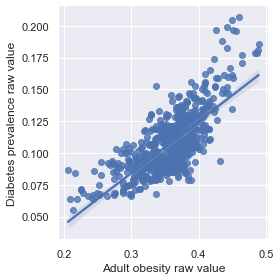

In [3]:
# 
sns.lmplot(
    data=ct, x="Adult obesity raw value", y="Diabetes prevalence raw value",  height=4,palette = "red", ci = 95)

## <font color = darkblue> Multiple Linear Regression (MLR)

### <font color = darkgreen> Step 1:

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
    
# remove NaNs from the table
ct2 = ct.dropna()

# Declaring the response column and the feature space
X = ct2.iloc[:,range(5,13) ]
y = ct2["Diabetes prevalence raw value"]


# ----------------------------------------
# train - test split
# Notice the test_size hyperparameter
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)



(460, 8)
(115, 8)


### <font color = darkgreen> Step 2: Scaling the feature space

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_stand = scaler.transform(X_train.values)

scaler.fit(X_test)
X_test_stand = scaler.transform(X_test.values)


### <font color = darkgreen> Step 3: Training the model

In [6]:

# ------------------------------------------------------
# Train the model
# Done in two ways:
# Unstandardized features and then standardizae features
# ------------------------------------------------------

from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(X_train, y_train)
model2 = LinearRegression().fit(X_train_stand, y_train)


In [7]:
# dir(model1)


### <font color = darkgreen> Step 4: Printing output

In [8]:

print("Model score, same as coeff of determination = R2")
print("Unstandardized model:", model1.score(X_test, y_test))
print("Standardized model:", model2.score(X_test_stand, y_test))
print("-----------")

# print("Model hyperparameters")
# print(model.get_params())
# print("-----------")

print("Model coefficients")
print("Unstandardized model:",model1.coef_)
print("Standardized model:",model2.coef_)
print("-----------")


print("Model intercept")
print("Unstandardized model:",model1.intercept_)
print("Standardized model:",model2.intercept_)
print("-----------")

from sklearn.metrics import r2_score
print("Coefficient of determination = R2")
print("Unstandardized model:",r2_score(y_test, model1.predict(X_test)))
print("Standardized model:",r2_score(y_test, model2.predict(X_test_stand)))
print("-----------")

from sklearn.metrics import mean_squared_error
print("MSE")
print("Unstandardized model:",mean_squared_error(y_test,model1.predict(X_test)))
print("Standardized model:",mean_squared_error(y_test,model2.predict(X_test_stand)))
print("-----------")


Model score, same as coeff of determination = R2
Unstandardized model: 0.8961370239605356
Standardized model: 0.8747439920434776
-----------
Model coefficients
Unstandardized model: [ 0.46986612 -0.00399854  0.11354846 -0.04302405 -0.03961111 -0.15824957
  0.0102332   0.02467909]
Standardized model: [ 0.0232884  -0.00123499  0.00486864 -0.00181071 -0.00131261 -0.00389694
  0.00096022  0.00141755]
-----------
Model intercept
Unstandardized model: -0.015187968199564222
Standardized model: 0.10735
-----------
Coefficient of determination = R2
Unstandardized model: 0.8961370239605356
Standardized model: 0.8747439920434776
-----------
MSE
Unstandardized model: 4.536027975419415e-05
Standardized model: 5.470330023706033e-05
-----------


## Assignment 3A


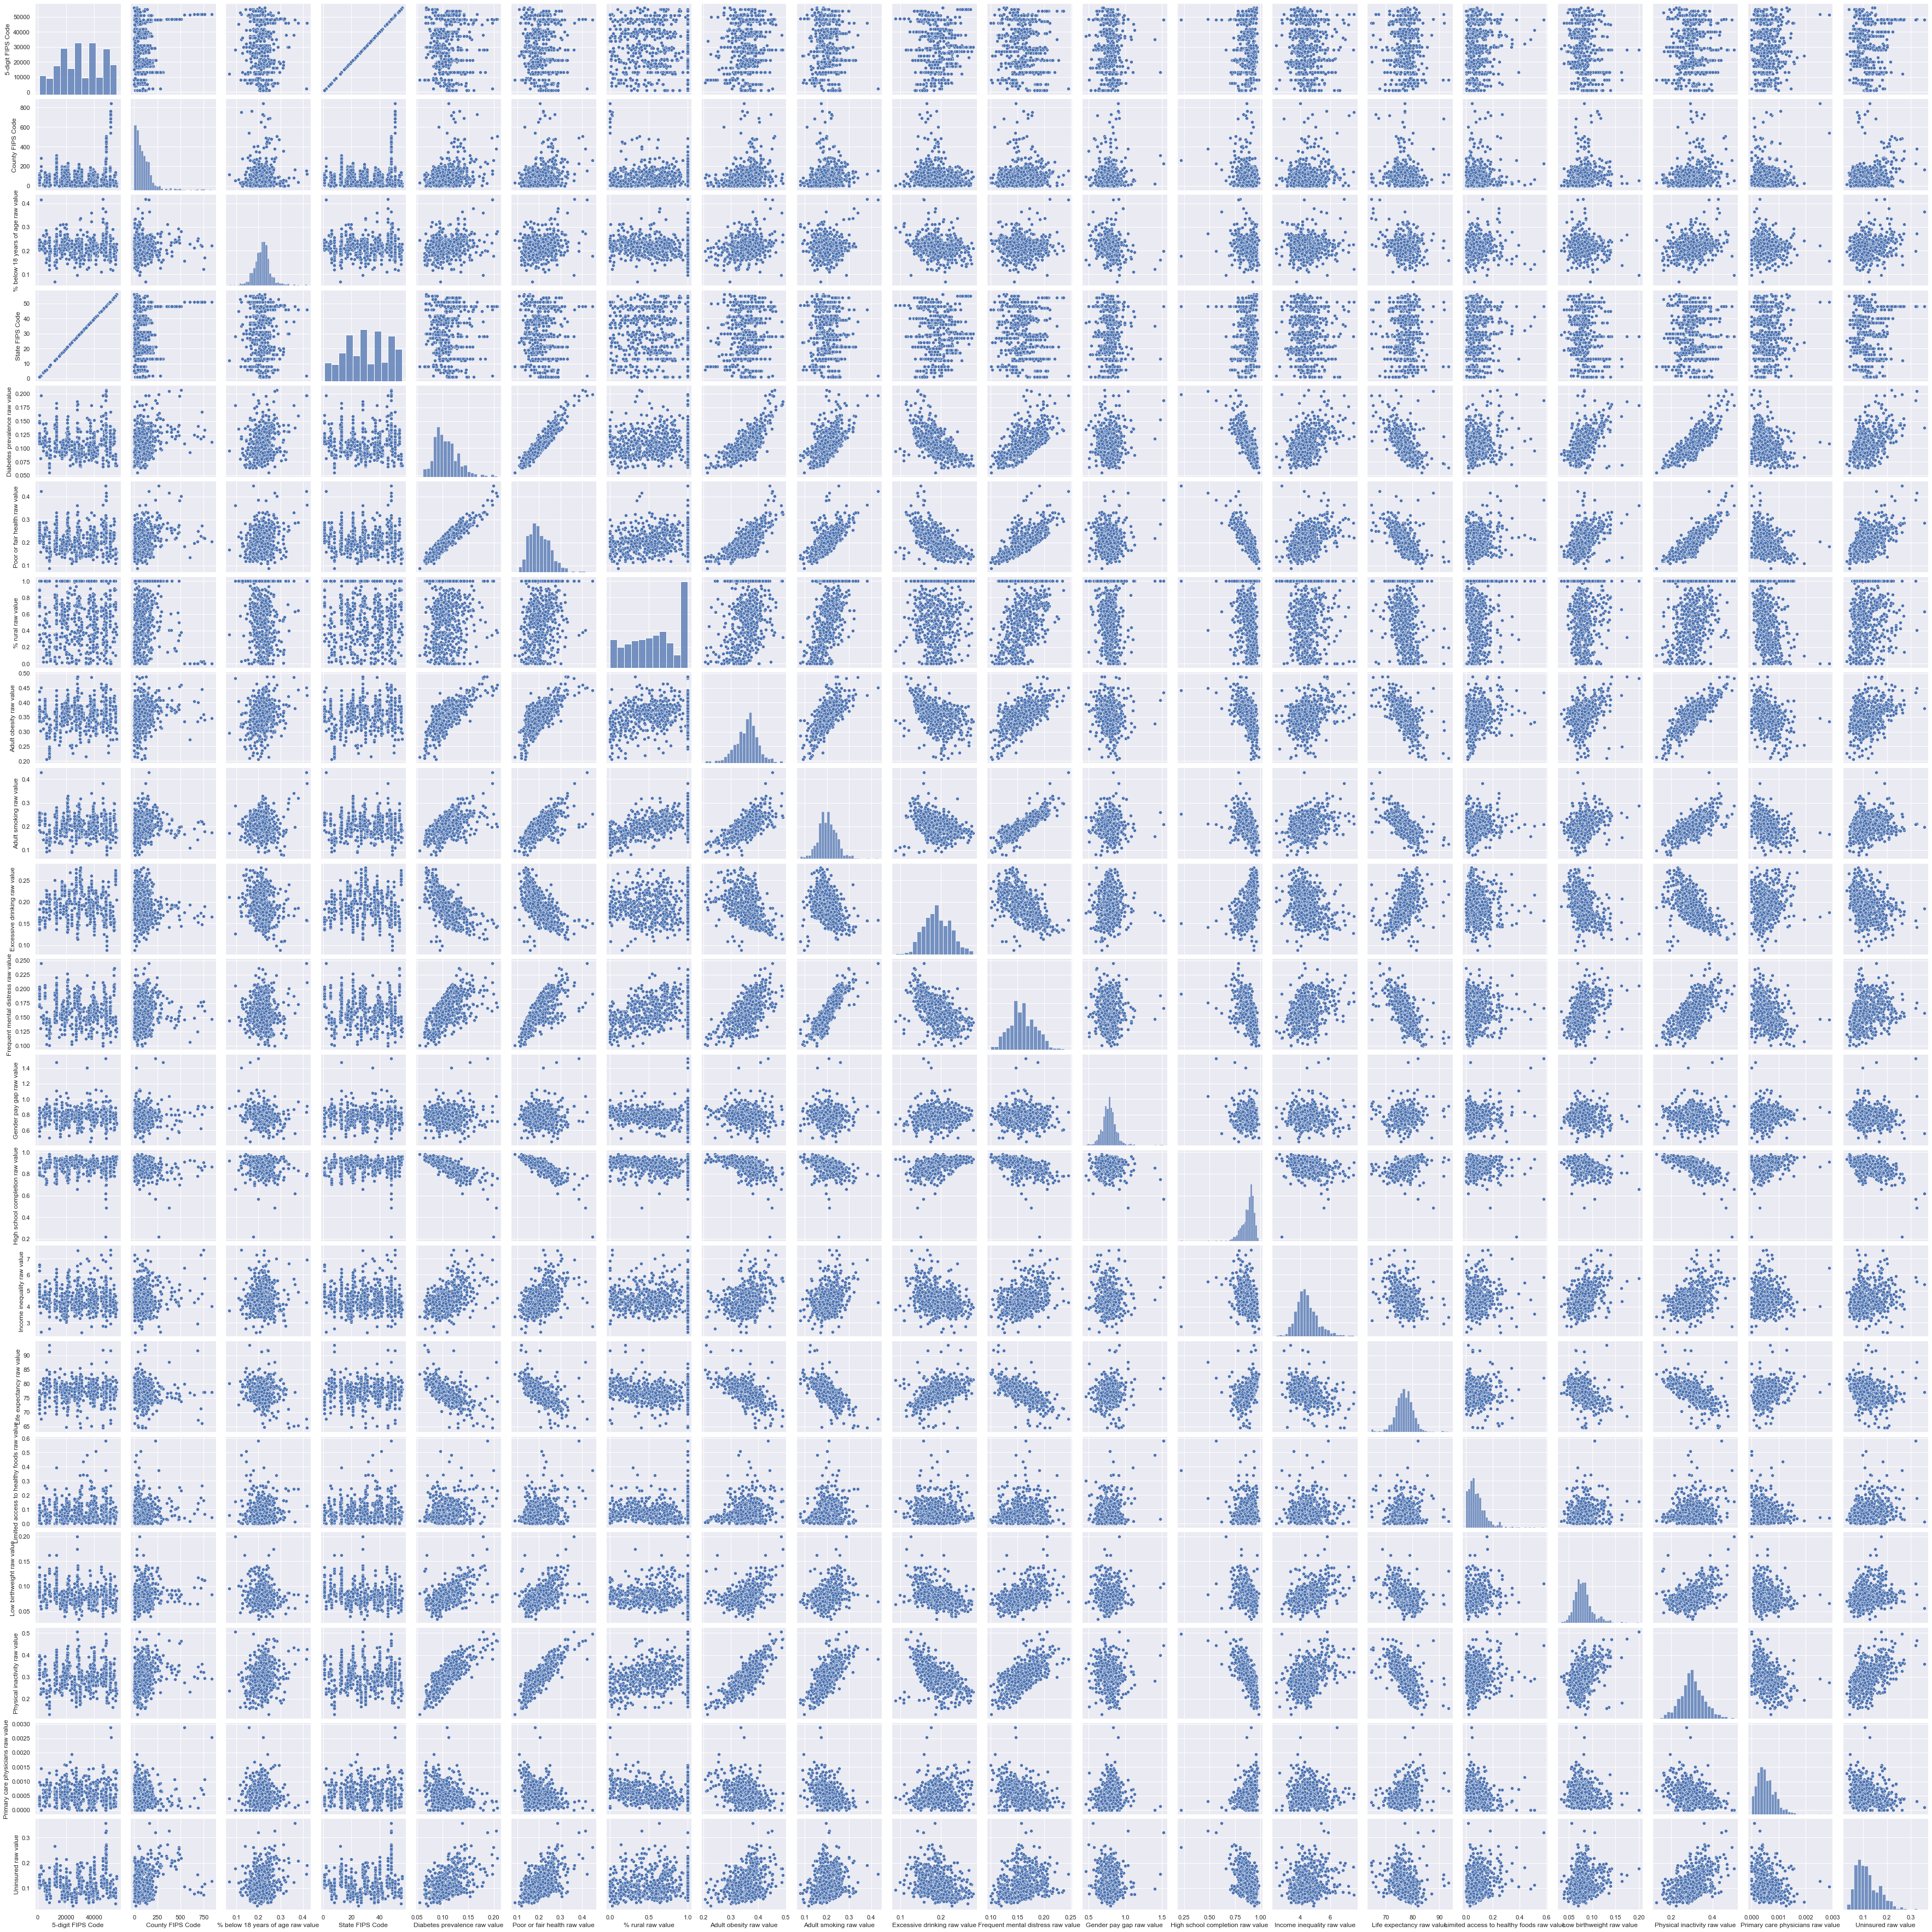

In [9]:
# Part 1

sns.pairplot(data=ct)

In [10]:
ct.corr()

5-digit FIPS Code  \
5-digit FIPS Code                                       1.00   
County FIPS Code                                        0.20   
% below 18 years of age raw value                       0.00   
State FIPS Code                                         1.00   
Diabetes prevalence raw value                           0.03   
Poor or fair health raw value                           0.03   
% rural raw value                                      -0.03   
Adult obesity raw value                                 0.15   
Adult smoking raw value                                -0.02   
Excessive drinking raw value                           -0.00   
Frequent mental distress raw value                     -0.09   
Gender pay gap raw value                                0.01   
High school completion raw value                       -0.05   
Income inequality raw value                            -0.03   
Life expectancy raw value                              -0.01   
Limited access to healthy foods raw value               0.09   
Low birthweight raw value                              -0.10   
Physical inactivity raw value                           0.04   
Primary care physicians raw value                       0.01   
Uninsured raw value                                     0.13   

                                           County FIPS Code  \
5-digit FIPS Code                                      0.20   
County FIPS Code                                       1.00   
% below 18 years of age raw value                      0.02   
State FIPS Code                                        0.19   
Diabetes prevalence raw value                          0.33   
Poor or fair health raw value                          0.26   
% rural raw value                                     -0.10   
Adult obesity raw value                                0.21   
Adult smoking raw value                                0.06   
Excessive drinking raw value                          -0.15   
Frequent mental distress raw value                     0.06   
Gender pay gap raw value                               0.03   
High school completion raw value                      -0.23   
Income inequality raw value                            0.15   
Life expectancy raw value                             -0.11   
Limited access to healthy foods raw value              0.03   
Low birthweight raw value                              0.16   
Physical inactivity raw value                          0.22   
Primary care physicians raw value                      0.02   
Uninsured raw value                                    0.28   

                                           % below 18 years of age raw value  \
5-digit FIPS Code                                                       0.00   
County FIPS Code                                                        0.02   
% below 18 years of age raw value                                       1.00   
State FIPS Code                                                         0.00   
Diabetes prevalence raw value                                           0.25   
Poor or fair health raw value                                           0.20   
% rural raw value                                                      -0.15   
Adult obesity raw value                                                 0.25   
Adult smoking raw value                                                 0.07   
Excessive drinking raw value                                           -0.24   
Frequent mental distress raw value                                      0.01   
Gender pay gap raw value                                               -0.21   
High school completion raw value                                       -0.14   
Income inequality raw value                                             0.02   
Life expectancy raw value                                              -0.24   
Limited access to healthy foods raw value                               0.01   
Low birthweigh

In [11]:
# physical inactivity, frequent mental distress, adult smoking, adult obesity, poor or fair health, diabetes prevalence are highly associated with life expectancy. Their correlation with life expectancy is higher than 0.5.

In [12]:
# Part 2

ct3 = ct.dropna()

# Declaring the response column and the feature space
X1 = ct3.loc[:,[ 'Poor or fair health raw value', 'Adult obesity raw value', 'Adult smoking raw value', 'Frequent mental distress raw value', 'Physical inactivity raw value']]
y1 = ct3["Life expectancy raw value"]

# ----------------------------------------
# train - test split
# Notice the test_size hyperparameter
# ----------------------------------------

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

print(X1_train.shape)
print(X1_test.shape)

scaler = StandardScaler()

scaler.fit(X1_train)
X1_train_stand = scaler.transform(X1_train.values)

scaler.fit(X1_test)
X1_test_stand = scaler.transform(X1_test.values)

model11 = LinearRegression().fit(X1_train, y1_train)
model12 = LinearRegression().fit(X1_train_stand, y1_train)

print("-----------")
print("Coefficient of determination = R2")
print("Unstandardized model:",r2_score(y1_test, model11.predict(X1_test)))
print("Standardized model:",r2_score(y1_test, model12.predict(X1_test_stand)))
print("-----------")

(460, 5)
(115, 5)
-----------
Coefficient of determination = R2
Unstandardized model: 0.6402675905614752
Standardized model: 0.6369492801567953
-----------


In [13]:
# The two models are almost in the r2 score. The one of the unstandardized is slightly higher which means some information are lost during standardizing.

In [14]:
# Declaring the response column and the feature space
X2 = ct3.loc[:,['Adult obesity raw value', 'Adult smoking raw value', 'Frequent mental distress raw value', 'Physical inactivity raw value']]
y2 = ct3["Life expectancy raw value"]

# ----------------------------------------
# train - test split
# Notice the test_size hyperparameter
# ----------------------------------------

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

print(X2_train.shape)
print(X2_test.shape)

scaler = StandardScaler()

scaler.fit(X2_train)
X2_train_stand = scaler.transform(X2_train.values)

scaler.fit(X2_test)
X2_test_stand = scaler.transform(X2_test.values)

model21 = LinearRegression().fit(X2_train, y2_train)
model22 = LinearRegression().fit(X2_train_stand, y2_train)

print("-----------")
print("Coefficient of determination = R2")
print("Unstandardized model:",r2_score(y2_test, model21.predict(X2_test)))
print("Standardized model:",r2_score(y2_test, model22.predict(X2_test_stand)))
print("-----------")

(460, 4)
(115, 4)
-----------
Coefficient of determination = R2
Unstandardized model: 0.6407596730330523
Standardized model: 0.632458361677581
-----------


In [15]:
# After removing the predictor Poor or fair health raw value, the r2 score of the unstandardized model increased a bit and the one of the standardized model decrease slightly. It is worth the change since the change is tiny and less data is needed.

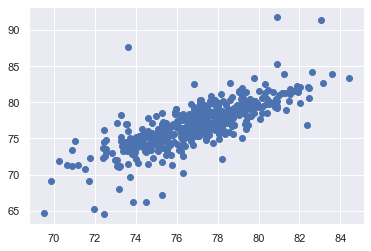

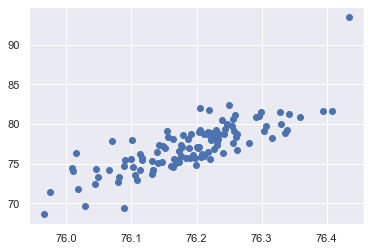

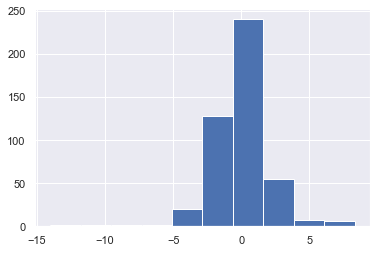

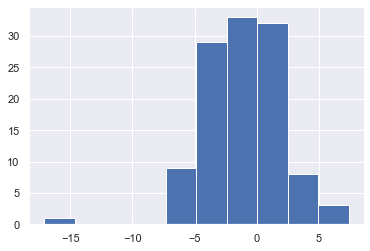

In [16]:
# The prediction works pretty well on the train set. The result is still in reasonable range for the test set, though there exist some outliers.

plt.scatter(model21.predict(X2_train), y2_train)
plt.show()
plt.scatter(model22.predict(X2_test), y2_test)
plt.show()
plt.hist(model21.predict(X2_train) - y2_train)
plt.show()
plt.hist(model22.predict(X2_test) - y2_test)
plt.show()

## <font color = darkred> The following set of code is not part of assignment 3A. 

## <font color = darkblue> Stochastic Gradient Descent Regressor

In [17]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, reg.predict(X_test))

# reg.get_params()


0.8679392681432803

In [19]:
sgd = SGDRegressor()
sgd.fit(X_train_stand, y_train)
sgd.score(X_test_stand, y_test)

0.8662628954345635

In [20]:
sgd.densify()

SGDRegressor()

## <font color = darkblue>  Logistic Regression

In [21]:
# -------------------
#One Hot Encoding
# -------------------
one_hot_encoded = pd.get_dummies(X.iloc[:,-2:])
print("One Hot Encoding: \n", one_hot_encoded)

# -------------------
#Binary Encoding
# -------------------
binary_encoded = pd.get_dummies(X.iloc[:,-2:], drop_first=True)
print("\nBinary Encoding: \n", binary_encoded)

One Hot Encoding: 
      Gender pay gap raw value  High school completion raw value
0                        0.82                              0.85
2                        0.77                              0.87
3                        0.63                              0.88
4                        0.88                              0.96
5                        0.72                              0.91
..                        ...                               ...
634                      0.81                              0.88
635                      0.74                              0.97
636                      0.80                              0.87
637                      0.75                              0.82
638                      0.76                              0.79

[575 rows x 2 columns]

Binary Encoding: 
      Gender pay gap raw value  High school completion raw value
0                        0.82                              0.85
2                        0.77           

In [22]:
from sklearn.model_selection import train_test_split

# Attaching the one-hot-encoded features to the rest of the feature space
X = ct2.iloc[:,list(range(4,13))].join(one_hot_encoded)
    
y = ct2["Cat_Unemploy"]


# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)



ValueError: columns overlap but no suffix specified: Index(['Gender pay gap raw value', 'High school completion raw value'], dtype='object')

### MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_minmax = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

## <font color = darkblue> Sigmoid function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))

sns.lineplot(x, y, color = 'red')
plt.title('Sigmoid Function')
plt.show()

